# Decision Tree

Dataset: NOAA Reef Check Bleaching Data from Kaggle

Link: https://www.kaggle.com/datasets/oasisdata/noaa-reef-check-coral-bleaching-data

The original dataset is used.

In [ ]:
# Imported necessary libraries
from google.colab import files
import pandas as pd
import io
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# To access the CSV file from local drive
dataset = files.upload()

Saving NOAA_Reef_Check__Bleaching_Data.csv to NOAA_Reef_Check__Bleaching_Data.csv


In [ ]:
# Using pandas to read the uploaded CSV
df = pd.read_csv(io.BytesIO(dataset['NOAA_Reef_Check__Bleaching_Data.csv']))

# Checking the datatypes and dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9111 entries, 0 to 9110
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bleaching    9111 non-null   object 
 1   Ocean        9111 non-null   object 
 2   Year         9111 non-null   int64  
 3   Depth        9111 non-null   float64
 4   Storms       9111 non-null   object 
 5   HumanImpact  9111 non-null   object 
 6   Siltation    9111 non-null   object 
 7   Dynamite     9111 non-null   object 
 8   Poison       9111 non-null   object 
 9   Sewage       9111 non-null   object 
 10  Industrial   9111 non-null   object 
 11  Commercial   9111 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 854.3+ KB


,Bleaching,Ocean,Year,Depth,Storms,HumanImpact,Siltation,Dynamite,Poison,Sewage,Industrial,Commercial
0,No,Atlantic,2005,4.0,yes,high,often,none,none,high,none,none
1,No,Red Sea,2004,6.0,no,high,occasionally,none,none,low,none,none
2,No,Pacific,1998,3.0,no,low,never,none,none,none,low,none
3,No,Pacific,1998,10.0,no,low,never,none,none,none,low,none
4,No,Atlantic,1997,10.0,no,high,never,none,none,high,moderate,none


In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2)

train_data

,Bleaching,Ocean,Year,Depth,Storms,HumanImpact,Siltation,Dynamite,Poison,Sewage,Industrial,Commercial
1224,No,Pacific,2004,12.5,no,low,never,none,none,none,none,none
4308,No,Pacific,2013,2.0,no,low,occasionally,none,none,low,none,low
4309,No,Pacific,2013,1.9,no,low,occasionally,none,none,low,none,low
5025,No,Atlantic,1997,10.0,no,moderate,never,none,none,none,none,none
2166,No,Pacific,2005,10.0,no,moderate,never,high,low,none,none,low
...,...,...,...,...,...,...,...,...,...,...,...,...
4566,No,Pacific,2004,5.0,yes,low,never,none,none,none,none,none
2913,No,Pacific,2008,5.0,yes,low,never,none,none,none,none,none
6411,No,Pacific,1997,10.0,no,low,never,none,none,none,none,none
1474,No,Atlantic,1998,3.0,no,moderate,never,low,none,none,none,none


In [ ]:
test_data

,Bleaching,Ocean,Year,Depth,Storms,HumanImpact,Siltation,Dynamite,Poison,Sewage,Industrial,Commercial
1621,No,Pacific,2008,3.0,no,high,often,moderate,moderate,low,none,moderate
857,No,Pacific,2012,5.0,yes,high,often,moderate,moderate,low,low,low
4432,No,Pacific,2014,2.5,yes,low,occasionally,none,none,none,none,low
6469,No,Atlantic,2008,10.0,yes,moderate,often,none,none,low,none,moderate
1309,No,Pacific,2005,10.0,no,low,occasionally,moderate,moderate,low,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...
7252,No,Indian,2013,3.0,no,none,never,none,none,none,moderate,none
2759,No,Pacific,2002,10.0,yes,low,never,none,none,low,none,none
208,No,Pacific,2003,2.5,no,low,never,none,low,low,low,none
1888,No,Pacific,2007,6.0,no,low,never,none,none,none,none,none


In [ ]:
# Splitting the dataset into features and target variable
feature_cols=['Storms','HumanImpact','Poison', 'Sewage', 'Industrial']
X = test_data[feature_cols] # Features
y = test_data['Bleaching'] # Target variable

In [ ]:
# .get_dummies() converts categorical data into dummy variables
X = pd.get_dummies(X)

In [ ]:
X.head()

,Storms_no,Storms_yes,HumanImpact_high,HumanImpact_low,HumanImpact_moderate,HumanImpact_none,Poison_high,Poison_low,Poison_moderate,Poison_none,Sewage_high,Sewage_low,Sewage_moderate,Sewage_none,Industrial_high,Industrial_low,Industrial_moderate,Industrial_none
1621,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
857,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
4432,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
6469,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
1309,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0


In [ ]:
# Importing the necessary libraries
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

import pandas as pd
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# Using DecisionTreeClassifier from sklearn with entropy as the criterion
model=DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)
y_predict = model.predict(X)

# Getting the accuracy score of the prediction
print(metrics.accuracy_score(y,y_predict))

0.9747668678003292


In [ ]:
# Printing the arrays of y and y_predict
# .ravel() returns a 1d array of the input-array elements with the same type
print(y.ravel())
print(y_predict.ravel())

['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']


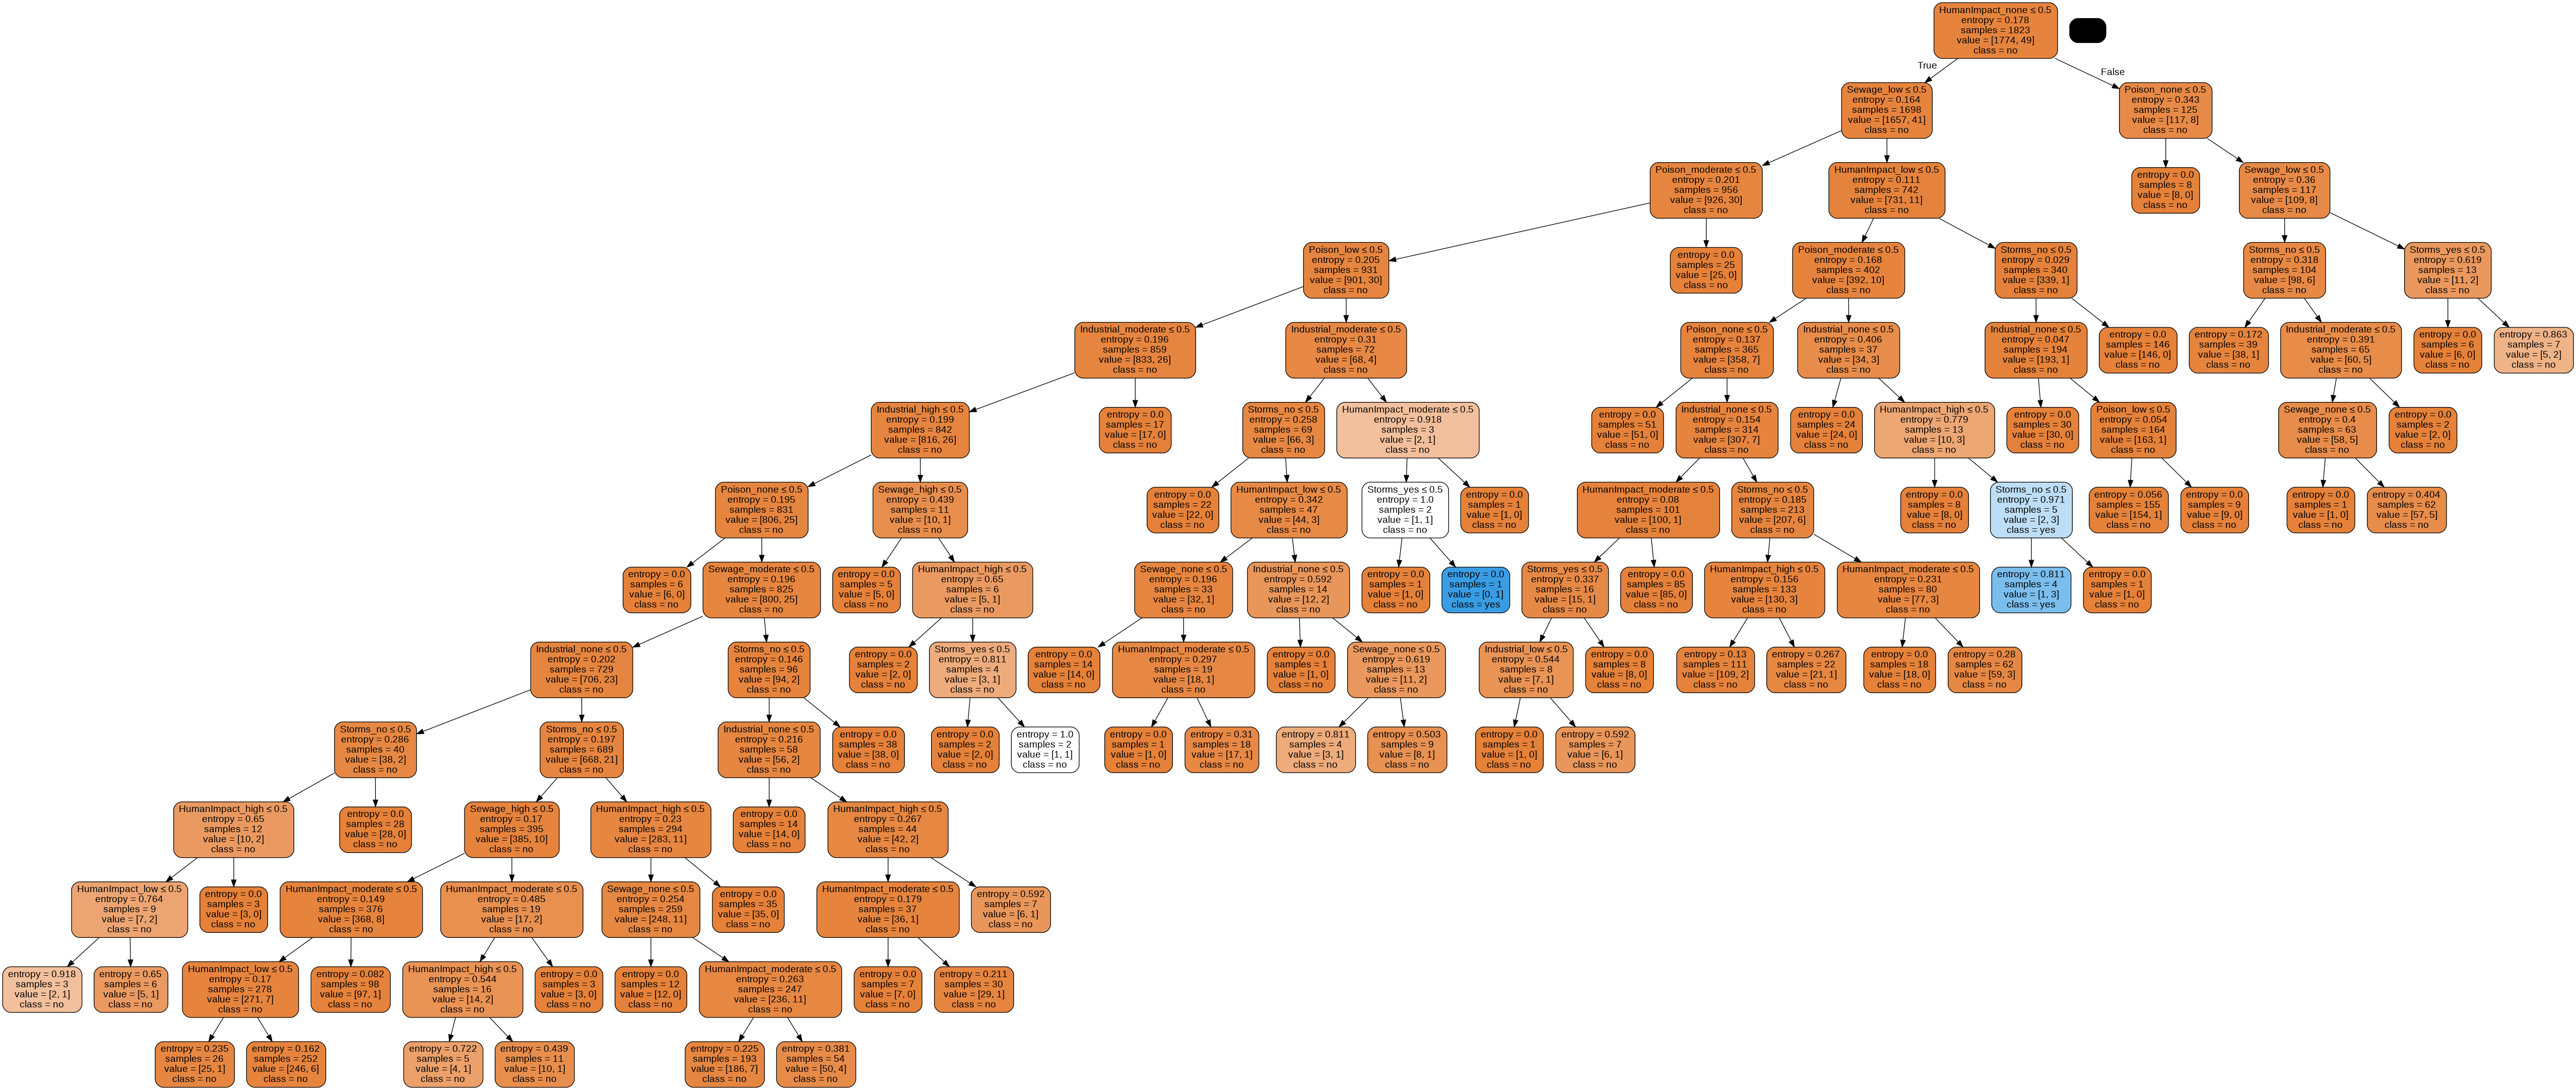

In [ ]:
# Displaying the decision tree by creating it using graphs
dot_data = StringIO()

# export_graphviz is used to export a decision tree in DOT format
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['no','yes'])

# The DOT format is then made into a graph using .graph_from_dot_data()
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bleaching_probability.png')
Image(graph.create_png())

0.9726948408342481
['No' 'No' 'No' ... 'No' 'No' 'No']
['No' 'No' 'No' ... 'No' 'No' 'No']


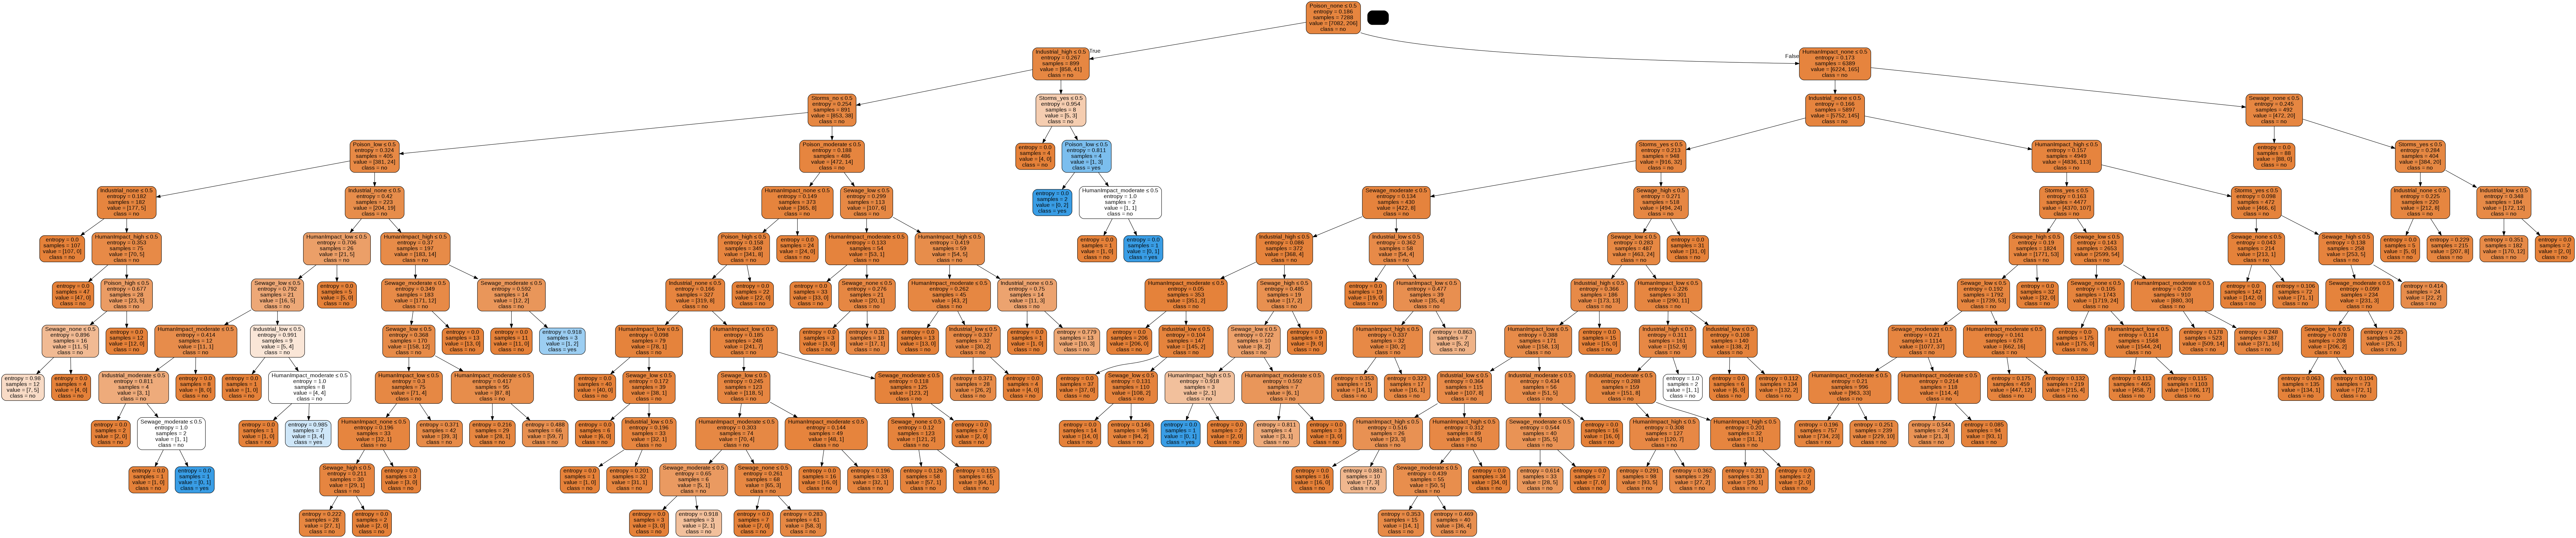

In [ ]:
# Decision tree for train data

feature_cols=['Storms','HumanImpact','Poison', 'Sewage', 'Industrial']
X = train_data[feature_cols] # Features
y = train_data['Bleaching'] # Target variable

X = pd.get_dummies(X)

# Using DecisionTreeClassifier from sklearn with entropy as the criterion
model=DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)
y_predict = model.predict(X)

# Getting the accuracy score of the prediction
print(metrics.accuracy_score(y,y_predict))

# Printing the arrays of y and y_predict
# .ravel() returns a 1d array of the input-array elements with the same type
print(y.ravel())
print(y_predict.ravel())

# Displaying the decision tree by creating it using graphs
dot_data = StringIO()

# export_graphviz is used to export a decision tree in DOT format
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['no','yes'])

# The DOT format is then made into a graph using .graph_from_dot_data()
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bleaching_probability_train.png')
Image(graph.create_png())

# Evaluation

Based on our testing, the accuracy scores yielded very similar results as shown here:  

> Testing data = 0.9747668678003292
>
> Training data = 0.9726948408342481

One thing to note, despite being very similar in accuracy score, they are both different looking trees in comparison. 

Because the accuracy of the test data is very similar, the training of the data is successful.
